In [1]:
%pylab inline
import pandas as pd
import numpy  as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as s
from matplotlib.colors import LogNorm
s.set(rc={'image.cmap': "jet"})
figsize(12,10)
rcParams['figure.facecolor'] = (1,1,1,1)
rcParams['savefig.facecolor'] = (1,1,1,1)

In [3]:
def plot_matrix(frame, **args):
    from matplotlib.colors import LogNorm
    x,y = np.meshgrid(np.array(frame.index,   dtype=float),
                      np.array(frame.columns, dtype=float))
    z = frame.T.values.astype(float)
    ret = gca().pcolor(y,x,z, **args)
    (lambda x: xlim(x[0],x[-1]))(frame.columns)
    (lambda x: ylim(x[0],x[-1]))(frame.index  ) 
    return ret

# 1 There are the bins from the JS app

In [4]:
betaTheoretic = np.array([ 
    0.4, 0.4147083427294357, 0.4297280251026429, 0.4450403909356994, 0.4606240084534386, 0.4764546384120651, 
         0.4925052439125105, 0.5087460471842641, 0.5251446378598004, 0.5416661361701296, 0.5582734130726269, 
         0.5749273675970504, 0.5915872597150694, 0.6082110948808858, 0.6247560541596080, 0.6411789616808273, 
         0.6574367791650310, 0.6734871156098977, 0.6892887390214797, 0.7048020764378558, 0.7199896884909629, 
         0.7348167054129555, 0.7492512126947839, 0.7632645764764647, 0.7768317010774621, 0.7899312137155933, 
         0.8025455742483953, 0.8146611105322752, 0.8262679825729968, 0.8373600809008588, 0.8479348664431029, 
         0.8579931605210849, 0.8675388944464776, 0.8765788285418612, 0.8851222503098053, 0.8931806609871203, 
         0.9007674589276944, 0.9078976272444162, 0.9145874319927806, 0.9208541359733099, 0.9267157320331831, 
         0.9321906986122767, 0.9372977792440818, 0.9420557868130696, 0.9464834326004606, 0.9505991795234627, 
         0.9544211184844238, 0.9579668663859606, 0.9612534841221809, 0.9642974127088534, 0.9671144256503917,
         0.9697195956427809, 0.9721272737641616, 0.9743510793953442, 0.9764038992294443, 0.9782978938634144, 
         0.9800445106065235, 0.9816545012855892, 0.9831379439691663, 0.9845042676694992, 0.9857622792093981, 
         0.9869201915597940, 0.9879856530617125, 0.9889657770435114, 0.9898671714305440, 0.9906959680203582, 
         0.9914578511627253, 0.9921580856409233, 0.9928015435995934, 0.9933927304059403, 0.9939358093658833, 
         0.9944346252457511, 0.9948927265739774, 0.9953133867166960, 0.9956996237367265, 0.9960542190577868, 
         0.9963797349653267, 0.9966785309825973, 0.9969527791658416, 0.9972044783661363, 0.9974354675077245, 
         0.9976474379339008, 0.9978419448718635, 0.9980204180675922, 0.9981841716409147, 0.9983344132096104, 
         0.9984722523297661, 0.9985987082977400, 0.9987147173570756, 0.9988211393515946, 0.9989187638637343, 
         0.9990083158750230, 0.9990904609834247, 0.9991658102101691, 0.9992349244266255, 0.9992983184297834, 
         0.9993564646930042, 0.9994097968168774, 0.9994587127032906, 0.9995035774741808, 0.9995447261548852,
         0.9995824661405623, 0.9996170794627837, 0.9996488248721179, 0.9996779397513396, 0.9997046418727785 
])
mp, md = 0.9382, 1.8756
rgdtTheoretic = mp * betaTheoretic / np.sqrt(1 - betaTheoretic**2)

In [5]:
from bq_hist import get_hist_series

In [6]:
betaMeasured=np.linspace(0.4,1.5,100)
rgdtMeasured=np.linspace(0.0, 15,151)

In [7]:
genBeta = "GenMomentum/SQRT(0.88022 + POW(GenMomentum,2))"

varNames = [('BetaTOF',  'B_bin',   betaMeasured ),
            ('R',        'R_bin',   rgdtMeasured ),
            (genBeta,    'Gen_bin', betaTheoretic)]

seriesB1034 = get_hist_series('AMS.protonsB1034',varNames)
seriesB800  = get_hist_series('AMS.protonsB800', varNames)

Job not yet complete...
Job not yet complete...


(0.4, 1.3)

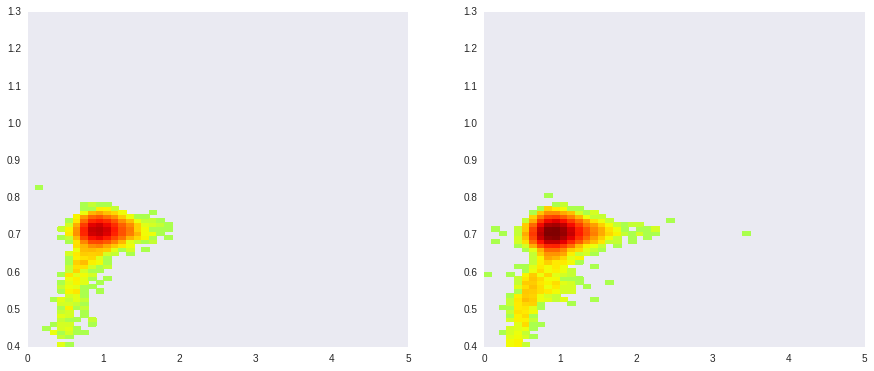

In [8]:
figsize(15,6)
subplot(1,2,1)
plot_matrix(seriesB1034[:,:,betaTheoretic[20]].unstack().iloc[1:,1:], norm=LogNorm(vmin=10**(-5),vmax=10000))
xlim(0,5); ylim(0.4,1.3)
subplot(1,2,2)
plot_matrix(seriesB800 [:,:,betaTheoretic[20]].unstack().iloc[1:,1:], norm=LogNorm(vmin=10**(-5),vmax=10000))
xlim(0,5);ylim(0.4,1.3)